In [1]:
!python --version

Python 3.9.17


## Import Statements

In [1]:
%matplotlib inline
from pydub import AudioSegment
from pydub.playback import play
import IPython.display as ipd
import os
import re
import shutil
import matplotlib.pyplot as plt
from glob import glob
from pathlib import Path

# Analyzing VCTK Dataset

Accoring to `Coqui TTS dataset formatter`, our version is `vctk_old`. 

URL:
    homepages.inf.ed.ac.uk/jyamagis/release/VCTK-Corpus.tar.gz

**New `vctk` corpus information:**

VCTK dataset v0.92.

URL:
    https://datashare.ed.ac.uk/bitstream/handle/10283/3443/VCTK-Corpus-0.92.zip

This dataset has 2 recordings per speaker that are annotated with ```mic1``` and ```mic2```.
It is believed that (😄 ) ```mic1``` files are the same as the previous version of the dataset.

mic1:
    Audio recorded using an omni-directional microphone (DPA 4035).
    Contains very low frequency noises.
    This is the same audio released in previous versions of VCTK:
    https://doi.org/10.7488/ds/1994

mic2:
    Audio recorded using a small diaphragm condenser microphone with
    very wide bandwidth (Sennheiser MKH 800).
    Two speakers, p280 and p315 had technical issues of the audio
    recordings using MKH 800.

In [3]:
# vctk_old formatter from Coqui
def vctk_old(root_path, meta_files=None, wavs_path="wav48", ignored_speakers=None):
    """homepages.inf.ed.ac.uk/jyamagis/release/VCTK-Corpus.tar.gz"""
    items = []
    meta_files = glob(f"{os.path.join(root_path,'txt')}/**/*.txt", recursive=True)
    for meta_file in meta_files:
        _, speaker_id, txt_file = os.path.relpath(meta_file, root_path).split(os.sep)
        file_id = txt_file.split(".")[0]
        # ignore speakers
        if isinstance(ignored_speakers, list):
            if speaker_id in ignored_speakers:
                continue
        with open(meta_file, "r", encoding="utf-8") as file_text:
            text = file_text.readlines()[0]
        wav_file = os.path.join(root_path, wavs_path, speaker_id, file_id + ".wav")
        items.append(
            {"text": text, "audio_file": wav_file, "speaker_name": "VCTK_old_" + speaker_id, "root_path": root_path}
        )
    return items

In [6]:
root_path="/media/arif/New Volume/Etc/data/VCTK/archive/VCTK-Corpus/VCTK-Corpus"

In [7]:
items = vctk_old(root_path)

In [8]:
counter = 0
for item in items:
    print(item)
    counter += 1
    if counter == 5: break

{'text': 'Please call Stella.\n', 'audio_file': '/media/arif/New Volume/Etc/data/VCTK/archive/VCTK-Corpus/VCTK-Corpus/wav48/p225/p225_001.wav', 'speaker_name': 'VCTK_old_p225', 'root_path': '/media/arif/New Volume/Etc/data/VCTK/archive/VCTK-Corpus/VCTK-Corpus'}
{'text': 'Ask her to bring these things with her from the store.\n', 'audio_file': '/media/arif/New Volume/Etc/data/VCTK/archive/VCTK-Corpus/VCTK-Corpus/wav48/p225/p225_002.wav', 'speaker_name': 'VCTK_old_p225', 'root_path': '/media/arif/New Volume/Etc/data/VCTK/archive/VCTK-Corpus/VCTK-Corpus'}
{'text': 'Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.\n', 'audio_file': '/media/arif/New Volume/Etc/data/VCTK/archive/VCTK-Corpus/VCTK-Corpus/wav48/p225/p225_003.wav', 'speaker_name': 'VCTK_old_p225', 'root_path': '/media/arif/New Volume/Etc/data/VCTK/archive/VCTK-Corpus/VCTK-Corpus'}
{'text': 'We also need a small plastic snake and a big toy frog for the kids.\n', 'audio_file': 

In [3]:
### X 
word_freq = {}
max_words = 0
min_words = 500
total_words = 0

csvfile = '/media/arif/Resource/Etc/data/LJSpeech-1.1/metadata.csv' # lab
csvfile = '/mnt/resource/Etc/data/LJSpeech-1.1/metadata.csv'        # home
with open(csvfile) as f:
    for i, line in enumerate(f):
        text = line.split('|')[2].strip()
        text = text.replace('.', ' ').replace(',', ' ').replace(';', ' ').replace('?', ' ').replace('!', ' ').replace('"', ' ')

        n = len(text.split())
        if n in word_freq: 
            word_freq[n] += 1
        else:
            word_freq[n] = 1
        max_words = max(max_words, n)
        min_words = min(min_words, n)
        total_words += n

        #if i == 50: break
print(f'Maximum words in a sentence: {max_words}')
print(f'Minimum words in a sentence: {min_words}')
print(f'Average words per sentence: {total_words / (i+1): .2f}')

Maximum words in a sentence: 39
Minimum words in a sentence: 1
Average words per sentence:  17.01


Text(0, 0.5, 'No. of samples')

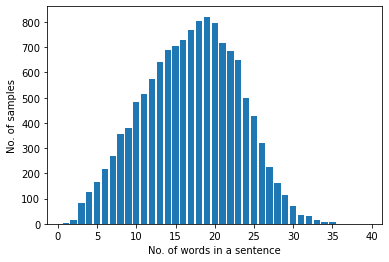

In [5]:
### X
plt.bar(word_freq.keys(), word_freq.values())
plt.xlabel('No. of words in a sentence')
plt.ylabel('No. of samples')

## Duration Calculation 
Calculating duration of original `vctk_old` 

**Summary:**
```
Total duration: 44 hours 2.36 minutes
Maximum duration: 19.28 seconds
Minimum duration: 0.60 seconds
Average duration: 3.58 seconds
```

In [41]:
wavdir = "/media/arif/New Volume/Etc/data/VCTK/archive/VCTK-Corpus/VCTK-Corpus/wav48"

wav_files = glob(f"{wavdir}/**/*.wav", recursive=True)

wav_duration = {}
max_duration = 0
min_duration = 1000
total_duration = 0

for i, file in enumerate(wav_files):
    audio = AudioSegment.from_wav(file)

    duration = audio.duration_seconds

    max_duration = max(max_duration, duration)
    min_duration = min(min_duration, duration)
    total_duration += duration

    duration = int(duration)
    if duration in wav_duration:
        wav_duration[duration] += 1
    else:
        wav_duration[duration] = 1

    # if i == 5: break

avg_duration = total_duration / len(wav_files)
total_duration /= 60 # sec. to min.
duration_hours = total_duration // 60
duration_mins = total_duration - (duration_hours * 60)

print(f"Total duration: {int(duration_hours)} hours {duration_mins:.2f} minutes")
print(f'Maximum duration: {max_duration:.2f} seconds')
print(f'Minimum duration: {min_duration:.2f} seconds')
print(f'Average duration: {avg_duration:.2f} seconds')

Total duration: 43 hours 52.78 minutes
Maximum duration: 19.28 seconds
Minimum duration: 0.60 seconds
Average duration: 3.58 seconds


## VCTK Sanity Check



In [5]:
root_path = "/media/arif/New Volume/Etc/data/VCTK/archive/VCTK-Corpus/VCTK-Corpus"
text_path = "/media/arif/New Volume/Etc/data/VCTK/archive/VCTK-Corpus/VCTK-Corpus/txt"
wav_path = "/media/arif/New Volume/Etc/data/VCTK/archive/VCTK-Corpus/VCTK-Corpus/wav48"

### Obtain the List of Speakers

In [6]:
speakers = sorted(os.listdir(os.path.join(root_path, 'txt')))

In [7]:
len(speakers)

108

In [10]:
for speaker in speakers:
    # print(speaker)
    text_dir = os.path.join(text_path, speaker)
    wav_dir = os.path.join(wav_path, speaker)

    nTexts = len(os.listdir(text_dir))
    nWavs = len(os.listdir(wav_dir))
    assert(nTexts == nWavs)
    
    print(f'Speaker: {speaker} \t Text files:{nTexts} \t Wav files: {nWavs}')
    # if nTexts != nWavs:
    #     print(f"{set(max(text_dir, wav_dir, key=len))} - {set(min(text_dir, wav_dir, key=len))}")

    # Analyze/process each sample
    for sample in os.listdir(wav_dir): 
            
        # Text analysis of speaker?
    
    
        # Speech Analysis of `speaeker'
        wav_file = os.path.join(wav_dir, sample)
        audio = AudioSegment.from_file(wav_file) 
        # print(audio.frame_rate) 

        # print("Asserting sample rate (should be 48000)")
        assert(audio.frame_rate == 48000)

        # asserting no. of channels 
        assert(audio.channels == 1)         
    

Speaker: p225 	 Text files:231 	 Wav files: 231
Speaker: p226 	 Text files:356 	 Wav files: 356
Speaker: p227 	 Text files:389 	 Wav files: 389
Speaker: p228 	 Text files:366 	 Wav files: 366
Speaker: p229 	 Text files:379 	 Wav files: 379
Speaker: p230 	 Text files:397 	 Wav files: 397
Speaker: p231 	 Text files:456 	 Wav files: 456
Speaker: p232 	 Text files:412 	 Wav files: 412
Speaker: p233 	 Text files:372 	 Wav files: 372
Speaker: p234 	 Text files:357 	 Wav files: 357
Speaker: p236 	 Text files:492 	 Wav files: 492
Speaker: p237 	 Text files:339 	 Wav files: 339
Speaker: p238 	 Text files:454 	 Wav files: 454
Speaker: p239 	 Text files:503 	 Wav files: 503
Speaker: p240 	 Text files:377 	 Wav files: 377
Speaker: p241 	 Text files:353 	 Wav files: 353
Speaker: p243 	 Text files:393 	 Wav files: 393
Speaker: p244 	 Text files:420 	 Wav files: 420
Speaker: p245 	 Text files:354 	 Wav files: 354
Speaker: p246 	 Text files:358 	 Wav files: 358
Speaker: p247 	 Text files:475 	 Wav fil

# Creating VCTK_old_22.05k Dataset 

In [5]:
src_dir = "/media/arif/New Volume/Etc/data/VCTK/VCTK_old_48k/VCTK-Corpus/VCTK-Corpus"
dest_dir = "/media/arif/New Volume/Etc/data/VCTK/VCTK_old_22.05k"

In [16]:
src_txt_dir = os.path.join(src_dir, "txt")  
dest_txt_dir = os.path.join(dest_dir, "txt")
shutil.copytree(src_txt_dir, dest_txt_dir)  

'/media/arif/New Volume/Etc/data/VCTK/VCTK_old_22.05k/txt'

In [6]:
src_wav_dir = "/media/arif/New Volume/Etc/data/VCTK/VCTK_old_48k/VCTK-Corpus/VCTK-Corpus/wav48"
dest_wav_dir = os.path.join(dest_dir, "wavs")

In [21]:
counter = 0 
for dirpath, dnames, fnames in os.walk(src_wav_dir):
    for fname in fnames:  
        audio = AudioSegment.from_file(os.path.join(dirpath, fname))

        audio = audio.set_frame_rate(22050)

        # file_handle = audio.export(os.path.join(dest_wav_dir, dname) + 
        folder = os.path.basename(os.path.normpath(dirpath))
        folder_path = os.path.join(dest_wav_dir, folder)
        # print(os.path.join(folder_path, fname))    

        if not os.path.exists(folder_path): 
            os.makedirs(folder_path) 
        file_handle = audio.export(os.path.join(folder_path, fname), format="wav")
        
        counter += 1 
        # if counter == 5: break 
    # if counter == 5: break  
# if counter == 5: break  

## VCTK_old_22.05k Sanity Check 

In [22]:
root_path = "/media/arif/New Volume/Etc/data/VCTK/VCTK_old_22.05k"
text_path = "/media/arif/New Volume/Etc/data/VCTK/VCTK_old_22.05k/txt"
wav_path = "/media/arif/New Volume/Etc/data/VCTK/VCTK_old_22.05k/wavs"
speakers = sorted(os.listdir(os.path.join(root_path, 'txt')))

In [23]:
len(speakers)

108

In [24]:
for speaker in speakers:
    # print(speaker)
    text_dir = os.path.join(text_path, speaker)
    wav_dir = os.path.join(wav_path, speaker)

    nTexts = len(os.listdir(text_dir))
    nWavs = len(os.listdir(wav_dir))
    assert(nTexts == nWavs)
    
    print(f'Speaker: {speaker} \t Text files:{nTexts} \t Wav files: {nWavs}')
    # if nTexts != nWavs:
    #     print(f"{set(max(text_dir, wav_dir, key=len))} - {set(min(text_dir, wav_dir, key=len))}")

    # Analyze/process each sample
    for sample in os.listdir(wav_dir): 
            
        # Text analysis of speaker?
    
    
        # Speech Analysis of `speaeker'
        wav_file = os.path.join(wav_dir, sample)
        audio = AudioSegment.from_file(wav_file) 
        # print(audio.frame_rate) 

        # print("Asserting sample rate (should be 22050)")
        assert(audio.frame_rate == 22050)

        # asserting no. of channels 
        assert(audio.channels == 1)         
    

Speaker: p225 	 Text files:231 	 Wav files: 231
Speaker: p226 	 Text files:356 	 Wav files: 356
Speaker: p227 	 Text files:389 	 Wav files: 389
Speaker: p228 	 Text files:366 	 Wav files: 366
Speaker: p229 	 Text files:379 	 Wav files: 379
Speaker: p230 	 Text files:397 	 Wav files: 397
Speaker: p231 	 Text files:456 	 Wav files: 456
Speaker: p232 	 Text files:412 	 Wav files: 412
Speaker: p233 	 Text files:372 	 Wav files: 372
Speaker: p234 	 Text files:357 	 Wav files: 357
Speaker: p236 	 Text files:492 	 Wav files: 492
Speaker: p237 	 Text files:339 	 Wav files: 339
Speaker: p238 	 Text files:454 	 Wav files: 454
Speaker: p239 	 Text files:503 	 Wav files: 503
Speaker: p240 	 Text files:377 	 Wav files: 377
Speaker: p241 	 Text files:353 	 Wav files: 353
Speaker: p243 	 Text files:393 	 Wav files: 393
Speaker: p244 	 Text files:420 	 Wav files: 420
Speaker: p245 	 Text files:354 	 Wav files: 354
Speaker: p246 	 Text files:358 	 Wav files: 358
Speaker: p247 	 Text files:475 	 Wav fil

# Creating VCTK_old_mini_22.05k Dataset 

In [29]:
speakers = ['p225', 'p230', 'p233', 'p234', 'p236', 'p238', 'p248', 'p249', 'p250', 'p253', 'p226', 'p227', 'p232', 'p237', 'p241', 'p243', 'p245', 'p246', 'p247', 'p251'] 
speakers = sorted(speakers)

In [26]:
src_dir = "/media/arif/New Volume/Etc/data/VCTK/VCTK_old_22.05k"
dest_dir = "/media/arif/New Volume/Etc/data/VCTK/VCTK_old_mini_22.05k"

In [27]:
src_txt_dir = os.path.join(src_dir, "txt")  
src_wav_dir = os.path.join(src_dir, "wavs")
dest_txt_dir = os.path.join(dest_dir, "txt")
dest_wav_dir = os.path.join(dest_dir, "wavs")

In [34]:
counter = 0 
for speaker in speakers: 
    # print(speaker)
    shutil.copytree(os.path.join(src_txt_dir, speaker), os.path.join(dest_txt_dir, speaker))
    shutil.copytree(os.path.join(src_wav_dir, speaker), os.path.join(dest_wav_dir, speaker))
    
    counter += 1 
    # if counter == 5: break 

## VCTK_old_mini_22.05k Sanity Check

In [35]:
root_path = "/media/arif/New Volume/Etc/data/VCTK/VCTK_old_mini_22.05k"
text_path = "/media/arif/New Volume/Etc/data/VCTK/VCTK_old_mini_22.05k/txt"
wav_path = "/media/arif/New Volume/Etc/data/VCTK/VCTK_old_mini_22.05k/wavs"
speakers = sorted(os.listdir(os.path.join(root_path, 'txt')))

In [36]:
len(speakers)

20

In [37]:
for speaker in speakers:
    # print(speaker)
    text_dir = os.path.join(text_path, speaker)
    wav_dir = os.path.join(wav_path, speaker)

    nTexts = len(os.listdir(text_dir))
    nWavs = len(os.listdir(wav_dir))
    assert(nTexts == nWavs)
    
    print(f'Speaker: {speaker} \t Text files:{nTexts} \t Wav files: {nWavs}')
    # if nTexts != nWavs:
    #     print(f"{set(max(text_dir, wav_dir, key=len))} - {set(min(text_dir, wav_dir, key=len))}")

    # Analyze/process each sample
    for sample in os.listdir(wav_dir): 
            
        # Text analysis of speaker?
    
    
        # Speech Analysis of `speaeker'
        wav_file = os.path.join(wav_dir, sample)
        audio = AudioSegment.from_file(wav_file) 
        # print(audio.frame_rate) 

        # print("Asserting sample rate (should be 22050)")
        assert(audio.frame_rate == 22050)

        # asserting no. of channels 
        assert(audio.channels == 1)         
    

Speaker: p225 	 Text files:231 	 Wav files: 231
Speaker: p226 	 Text files:356 	 Wav files: 356
Speaker: p227 	 Text files:389 	 Wav files: 389
Speaker: p230 	 Text files:397 	 Wav files: 397
Speaker: p232 	 Text files:412 	 Wav files: 412
Speaker: p233 	 Text files:372 	 Wav files: 372
Speaker: p234 	 Text files:357 	 Wav files: 357
Speaker: p236 	 Text files:492 	 Wav files: 492
Speaker: p237 	 Text files:339 	 Wav files: 339
Speaker: p238 	 Text files:454 	 Wav files: 454
Speaker: p241 	 Text files:353 	 Wav files: 353
Speaker: p243 	 Text files:393 	 Wav files: 393
Speaker: p245 	 Text files:354 	 Wav files: 354
Speaker: p246 	 Text files:358 	 Wav files: 358
Speaker: p247 	 Text files:475 	 Wav files: 475
Speaker: p248 	 Text files:376 	 Wav files: 376
Speaker: p249 	 Text files:335 	 Wav files: 335
Speaker: p250 	 Text files:481 	 Wav files: 481
Speaker: p251 	 Text files:364 	 Wav files: 364
Speaker: p253 	 Text files:375 	 Wav files: 375


## Duration CalcuFloation 
Calculating duration of `VCTK_old_mini_22.05k` dataset. 

**Summary:**
```
Total duration: 7 hours 40.36 minutes
Maximum duration: 16.00 seconds
Minimum duration: 1.24 seconds
Average duration: 3.60 seconds
```

In [38]:
wavdir = "/media/arif/New Volume/Etc/data/VCTK/VCTK_old_mini_22.05k/wavs"

wav_files = glob(f"{wavdir}/**/*.wav", recursive=True)

wav_duration = {}
max_duration = 0
min_duration = 1000
total_duration = 0

for i, file in enumerate(wav_files):
    audio = AudioSegment.from_wav(file)

    duration = audio.duration_seconds

    max_duration = max(max_duration, duration)
    min_duration = min(min_duration, duration)
    total_duration += duration

    duration = int(duration)
    if duration in wav_duration:
        wav_duration[duration] += 1
    else:
        wav_duration[duration] = 1

    # if i == 5: break

avg_duration = total_duration / len(wav_files)
total_duration /= 60 # sec. to min.
duration_hours = total_duration // 60
duration_mins = total_duration - (duration_hours * 60)

print(f"Total duration: {int(duration_hours)} hours {duration_mins:.2f} minutes")
print(f'Maximum duration: {max_duration:.2f} seconds')
print(f'Minimum duration: {min_duration:.2f} seconds')
print(f'Average duration: {avg_duration:.2f} seconds')

Total duration: 7 hours 40.36 minutes
Maximum duration: 16.00 seconds
Minimum duration: 1.24 seconds
Average duration: 3.60 seconds
